In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import plotly.express as px
import plotly

import plotly.graph_objects as go

# Let's try clustering

In [2]:
customers_scaled = pd.read_csv('../data/customers_scaled.csv', index_col=0)
customers_scaled

,income,age,years_with_bank,nbr_children,Albuquerque,Anaheim,Arlington,Atlanta,Austin,Baltimore,...,Seattle,St Louis,St Paul,Tampa,Toledo,Tucson,Tulsa,Virginia Beach,Washington,Wichita
0,0.181399,0.434211,0.555556,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.045818,0.763158,0.111111,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.128665,0.328947,0.888889,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.330667,0.539474,0.333333,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.309066,0.605263,1.000000,0.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743,0.183043,0.565789,0.666667,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,0.425231,0.486842,0.000000,0.4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0.104747,0.315789,0.777778,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# kmeans first

def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()


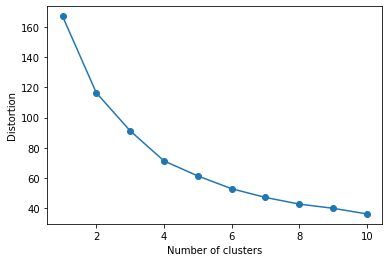

In [4]:
plot_distortion(customers_scaled.iloc[:,:4], max_clusters = 10)

In [5]:
# set up k_means params
km = KMeans(n_clusters=4,
            n_init=10,
            random_state=0)

In [6]:
# fit and predict
y_km = km.fit_predict(customers_scaled.iloc[:,:4])
y_km

array([3, 1, 3, 1, 3, 2, 0, 3, 2, 3, 3, 0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 1,
       3, 3, 2, 1, 0, 3, 3, 1, 1, 1, 2, 3, 1, 2, 0, 1, 3, 0, 0, 2, 1, 2,
       1, 1, 1, 0, 3, 1, 0, 0, 3, 3, 3, 1, 1, 3, 1, 3, 2, 0, 0, 1, 3, 0,
       3, 2, 0, 0, 1, 2, 3, 1, 3, 3, 0, 1, 0, 3, 1, 3, 1, 0, 3, 2, 1, 1,
       1, 3, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 3, 3, 2, 1, 2, 1, 3, 3, 3, 3,
       0, 3, 3, 1, 2, 3, 2, 1, 3, 2, 1, 2, 3, 2, 0, 3, 0, 1, 2, 0, 3, 1,
       0, 1, 3, 0, 3, 3, 0, 1, 3, 3, 3, 0, 3, 0, 3, 3, 1, 2, 0, 1, 1, 1,
       1, 3, 0, 3, 2, 3, 3, 3, 3, 2, 2, 2, 1, 0, 1, 3, 1, 3, 3, 1, 0, 0,
       3, 3, 3, 1, 3, 0, 3, 0, 3, 1, 1, 2, 3, 2, 1, 2, 0, 0, 2, 0, 0, 0,
       2, 2, 3, 3, 0, 0, 1, 3, 0, 1, 0, 3, 0, 0, 3, 3, 0, 2, 0, 2, 1, 2,
       3, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 2, 0,
       1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 1, 1, 2, 3, 2, 2,
       0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 3, 2, 1, 1, 1, 0, 0, 3, 3, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 1, 3, 0, 1, 3, 0, 0, 0,

In [9]:
customers_scaled['cluster_nogeo'] = y_km
customers_scaled

,income,age,years_with_bank,nbr_children,Albuquerque,Anaheim,Arlington,Atlanta,Austin,Baltimore,...,St Louis,St Paul,Tampa,Toledo,Tucson,Tulsa,Virginia Beach,Washington,Wichita,cluster_nogeo
0,0.181399,0.434211,0.555556,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0.045818,0.763158,0.111111,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.128665,0.328947,0.888889,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0.330667,0.539474,0.333333,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.309066,0.605263,1.000000,0.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
743,0.183043,0.565789,0.666667,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
744,0.425231,0.486842,0.000000,0.4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
745,0.104747,0.315789,0.777778,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [10]:
radar_scaled = customers_scaled.groupby('cluster_nogeo').mean()
radar_scaled

,income,age,years_with_bank,nbr_children,Albuquerque,Anaheim,Arlington,Atlanta,Austin,Baltimore,...,Seattle,St Louis,St Paul,Tampa,Toledo,Tucson,Tulsa,Virginia Beach,Washington,Wichita
cluster_nogeo,,,,,,,,,,,,,,,,,,,,,
0,0.047311,0.086466,0.365079,0.019704,0.009852,0.009852,0.004926,0.000000,0.014778,0.009852,...,0.000000,0.009852,0.009852,0.004926,0.014778,0.004926,0.009852,0.000000,0.004926,0.009852
1,0.185363,0.565649,0.208038,0.042553,0.005319,0.010638,0.000000,0.000000,0.005319,0.015957,...,0.021277,0.010638,0.005319,0.005319,0.010638,0.010638,0.000000,0.000000,0.010638,0.000000
2,0.221601,0.332420,0.325617,0.509722,0.013889,0.027778,0.000000,0.013889,0.034722,0.013889,...,0.013889,0.006944,0.013889,0.000000,0.006944,0.000000,0.020833,0.000000,0.000000,0.006944
3,0.195338,0.556542,0.774633,0.100943,0.009434,0.009434,0.000000,0.000000,0.009434,0.004717,...,0.014151,0.009434,0.009434,0.000000,0.004717,0.018868,0.018868,0.004717,0.014151,0.000000


In [51]:
def plotRadarChart(data,title):
    temp_list = []
    for i in range(len(data)):
        temp_list.append(go.Scatterpolar(
                                        r=data.iloc[i,:4].values,
                                        theta=data.columns[:4],
                                        name=str(data.index[i]),
                                        fill='toself'
        ))

    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                        showlegend = True, title=title)     
    fig = go.Figure(data = temp_list, layout = layout)     
    fig.show()

In [52]:
plotRadarChart(radar_scaled.iloc[:,:4], "Demographic segments, no geography")

# Let's try and use the geo data

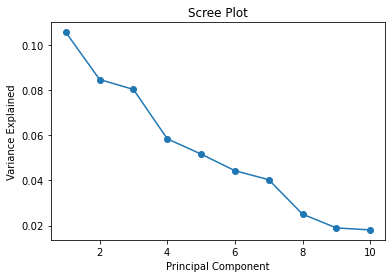

In [30]:
from sklearn.decomposition import PCA

# We need PCA to make the cities usable, how many PCs?

def screePlot(data, n_components=10):
    pca = PCA(n_components=n_components)
    pca_fit = pca.fit(data)
    pca_fit

    PC_values = np.arange(pca.n_components_) + 1
    PC_values

    plt.plot(PC_values, pca.explained_variance_ratio_, 'o-')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')

screePlot(customers_scaled.iloc[:,:-1])

In [75]:
# plot with 8 PCs

n_components = 8

pca = PCA(n_components=n_components)
pc_columns = []
for component in range(n_components):
    pc_columns.append('PC' + str(component+1))
        
principal_components = pd.DataFrame(pca.fit_transform(customers_scaled.iloc[:,:-1]), 
                                    columns=pc_columns)
principal_components


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.509029,-0.074793,-0.125874,-0.026134,-0.067442,0.101839,-0.055926,-0.089521
1,-0.494407,-0.491047,0.691653,0.216000,-0.199820,-0.478721,-0.067494,0.054762
2,1.524597,-0.573225,0.710875,-0.196794,0.263575,-0.062743,0.103403,-0.061419
3,-0.477087,-0.516336,0.713665,0.107269,-0.030329,-0.312400,0.013348,0.055191
4,1.625077,0.760985,0.318865,-0.106733,0.242379,0.126913,0.131808,0.104058
...,...,...,...,...,...,...,...,...
742,1.500069,-0.573584,0.704045,0.035930,0.150323,0.059332,0.078097,-0.068132
743,1.555690,0.789560,0.309961,0.019239,0.100605,0.001542,0.065657,0.009562
744,0.477769,-0.048454,-0.131842,0.443007,-0.371452,0.123167,-0.130500,-0.048099
745,1.512055,-0.078919,-0.116427,-0.287576,0.099172,0.068083,-0.024636,-0.131828


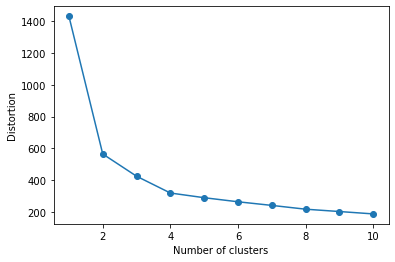

In [76]:
plot_distortion(principal_components, max_clusters = 10)

In [77]:
# set up k_means params
km = KMeans(n_clusters=4,
            n_init=10,
            random_state=0)

In [78]:
y_km = km.fit_predict(principal_components)
y_km

array([2, 3, 2, 3, 2, 0, 1, 2, 0, 2, 2, 1, 3, 1, 0, 1, 3, 1, 2, 1, 3, 3,
       2, 2, 0, 3, 1, 2, 2, 3, 3, 3, 0, 2, 3, 0, 1, 3, 2, 1, 1, 0, 3, 0,
       3, 3, 3, 1, 2, 3, 1, 1, 2, 2, 2, 3, 3, 2, 3, 2, 0, 1, 1, 3, 2, 1,
       2, 0, 1, 1, 3, 0, 2, 3, 2, 2, 1, 3, 1, 2, 3, 2, 3, 1, 2, 0, 3, 3,
       3, 2, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 2, 2, 0, 3, 0, 3, 2, 2, 2, 2,
       1, 2, 2, 3, 0, 2, 0, 3, 2, 0, 3, 0, 2, 0, 1, 2, 1, 3, 0, 1, 2, 3,
       1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 2, 1, 2, 1, 2, 2, 3, 0, 1, 3, 3, 3,
       3, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 3, 1, 3, 2, 3, 2, 2, 3, 1, 1,
       2, 2, 2, 3, 2, 1, 2, 1, 2, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 2, 2, 1, 1, 3, 2, 1, 3, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 3, 0,
       2, 0, 0, 0, 1, 0, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       3, 2, 3, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 3, 3, 3, 0, 2, 0, 0,
       1, 1, 3, 1, 0, 0, 0, 1, 1, 1, 2, 0, 3, 3, 3, 1, 1, 2, 2, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 3, 2, 1, 3, 2, 1, 1, 1,

In [79]:
principal_components['cluster_wgeo'] = y_km
principal_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,cluster_wgeo
0,1.509029,-0.074793,-0.125874,-0.026134,-0.067442,0.101839,-0.055926,-0.089521,2
1,-0.494407,-0.491047,0.691653,0.216000,-0.199820,-0.478721,-0.067494,0.054762,3
2,1.524597,-0.573225,0.710875,-0.196794,0.263575,-0.062743,0.103403,-0.061419,2
3,-0.477087,-0.516336,0.713665,0.107269,-0.030329,-0.312400,0.013348,0.055191,3
4,1.625077,0.760985,0.318865,-0.106733,0.242379,0.126913,0.131808,0.104058,2
...,...,...,...,...,...,...,...,...,...
742,1.500069,-0.573584,0.704045,0.035930,0.150323,0.059332,0.078097,-0.068132,2
743,1.555690,0.789560,0.309961,0.019239,0.100605,0.001542,0.065657,0.009562,2
744,0.477769,-0.048454,-0.131842,0.443007,-0.371452,0.123167,-0.130500,-0.048099,0
745,1.512055,-0.078919,-0.116427,-0.287576,0.099172,0.068083,-0.024636,-0.131828,2


In [80]:
radar_scaled_pca = principal_components.groupby('cluster_wgeo').mean()
radar_scaled_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
cluster_wgeo,,,,,,,,
0,0.502509,-0.028089,-0.010675,0.294904,-0.042829,0.267665,0.004574,-0.004724
1,-1.517770,-0.003557,0.000240,-0.124293,0.127888,0.066146,0.025756,-0.019375
2,1.549738,0.005382,0.002066,-0.151341,0.071738,-0.055860,0.010821,-0.010859
3,-0.493609,0.019287,0.005588,0.078987,-0.186184,-0.213453,-0.043517,0.036784


In [81]:
def plotRadarChart(data,title):
    temp_list = []
    for i in range(len(data)):
        temp_list.append(go.Scatterpolar(
                                        r=data.iloc[i].values,
                                        theta=data.columns,
                                        name=str(data.index[i]),
                                        fill='toself'
        ))

    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                        showlegend = True, title=title)     
    fig = go.Figure(data = temp_list, layout = layout)     
    fig.show()

plotRadarChart(radar_scaled_pca, "PCA Demographic segments, w geography")